## In Class Assignment 1

1. Train and display a decision tree with `max_depth=3` which classifies the `species` of a penguin via the four features shown below in the `sns.pairplot()`
1. Classify the following penguin by manually following their path through the tree:
    - body_mass_g = 4000
    - flipper_length_mm = 200
    - bill_depth_mm = 17
    - bill_length_mm = 45
1. Build a confusion matrix which shows how this decision tree performs in classifying "new" samples (cross validate).
1. Repeat part 1 of this ICA but set `max_depth=None` so that the tree continues building nodes until leaf nodes contain only a single class of samples (i.e. Gini score of each leaf is 0).  Critique this decision tree, is it appropriate to use on some new, unseen sample?
        



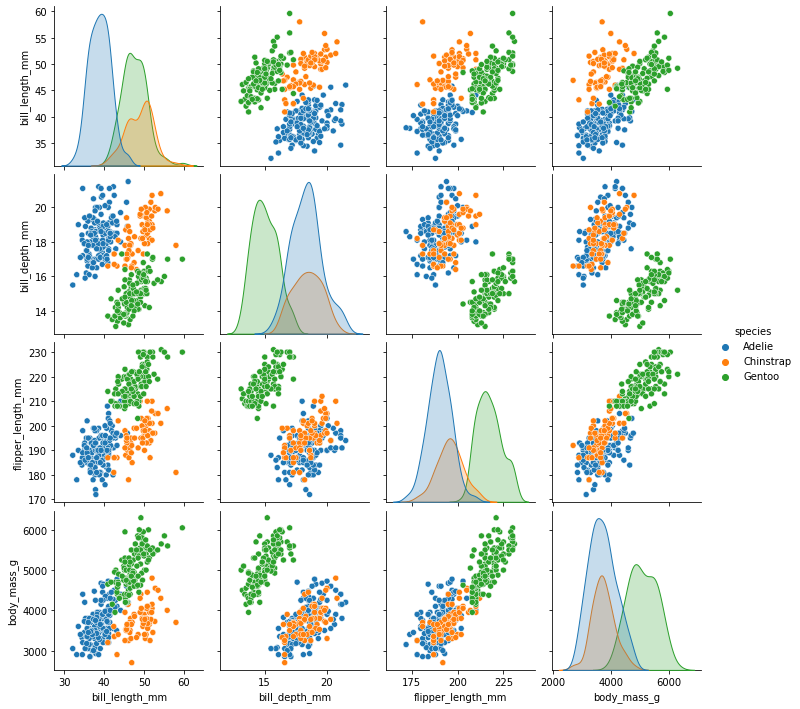

In [2]:
import pandas as pd
import seaborn as sns

df_penguin = sns.load_dataset('penguins')

#df_penguin['is_adelie'] = df_penguin['species'] == 'Adelie'
#df_penguin['is_chinstrap'] = df_penguin['species'] == 'Chinstrap'

df_penguin.dropna(axis=0, inplace=True)

sns.pairplot(df_penguin, hue='species')

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

[Text(0.5416666666666666, 0.875, 'flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]\nclass = Adelie'),
 Text(0.3333333333333333, 0.625, 'bill_length_mm <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144, 63, 1]\nclass = Adelie'),
 Text(0.16666666666666666, 0.375, 'bill_length_mm <= 42.35\ngini = 0.067\nsamples = 145\nvalue = [140, 5, 0]\nclass = Adelie'),
 Text(0.08333333333333333, 0.125, 'gini = 0.015\nsamples = 134\nvalue = [133, 1, 0]\nclass = Adelie'),
 Text(0.25, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [7, 4, 0]\nclass = Adelie'),
 Text(0.5, 0.375, 'body_mass_g <= 4125.0\ngini = 0.148\nsamples = 63\nvalue = [4, 58, 1]\nclass = Chinstrap'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 51\nvalue = [0, 51, 0]\nclass = Chinstrap'),
 Text(0.5833333333333334, 0.125, 'gini = 0.542\nsamples = 12\nvalue = [4, 7, 1]\nclass = Chinstrap'),
 Text(0.75, 0.625, 'bill_depth_mm <= 17.65\ngini = 0.107\nsamples = 125\nvalue = [2, 5, 118]\nclass = Gentoo'

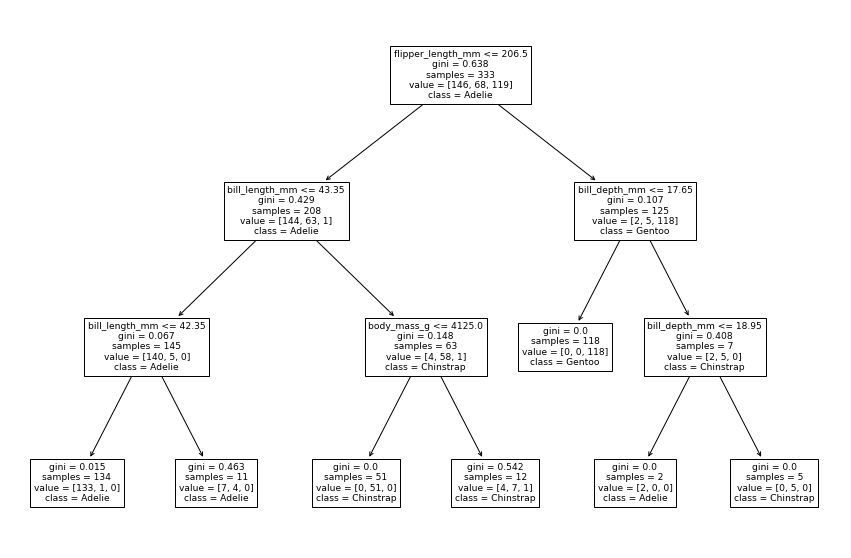

In [4]:
# Part 1

x_feat_list = ['bill_length_mm', 'bill_depth_mm', 
               'flipper_length_mm', 'body_mass_g']

max_depth = 3

# extract data from dataframe
x = df_penguin.loc[:, x_feat_list].values
y = df_penguin.loc[:, 'species'].values
    
# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)
    
# initialize empty figure (plot_tree sets text size to fill given figure
# if we resize figure afterwards text size remains too small)
plt.figure()
plt.gcf().set_size_inches(15, 10)
        
# 'plot' decision tree
tree.plot_tree(dec_tree_clf, 
               feature_names=x_feat_list,
               class_names=dec_tree_clf.classes_)

### Part 2

The penguin is classified as a chinstrap.

The flipper_length_mm <= 206.5 so we move left (yes)
The bill_length_mm > 43.35 so we move right (no)
The body_mass_g <= 4125 so we move left (yes)

In [5]:
# Part 3

from sklearn.model_selection import StratifiedKFold

n_splits = 10
max_depth = 3
x_feat_list = ['bill_depth_mm', 'bill_length_mm', 
               'flipper_length_mm', 'body_mass_g']
y_feat = 'species'

x = df_penguin.loc[:, x_feat_list].values
y_true = df_penguin.loc[:, y_feat].values

# initialize a classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

skfold = StratifiedKFold(n_splits=n_splits)

y_pred = np.empty_like(y_true)
for train_idx, test_idx in skfold.split(x, y_true):
    # index to split training / test data
    x_train = x[train_idx, :]
    x_test = x[test_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    dec_tree_clf.fit(x_train, y_true_train)

    # estimate each penguin's species
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

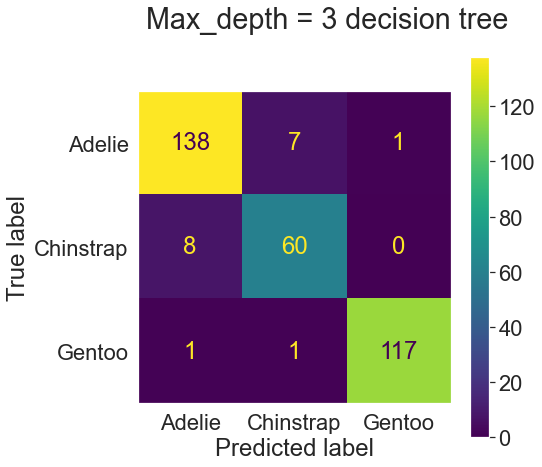

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

sns.set(font_scale=2)
conf_mat_disp.plot()
plt.suptitle('Max_depth = 3 decision tree')

plt.gcf().set_size_inches(7, 7)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

[Text(0.640625, 0.9375, 'flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]\nclass = Adelie'),
 Text(0.46875, 0.8125, 'bill_length_mm <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144, 63, 1]\nclass = Adelie'),
 Text(0.3125, 0.6875, 'bill_length_mm <= 42.35\ngini = 0.067\nsamples = 145\nvalue = [140, 5, 0]\nclass = Adelie'),
 Text(0.1875, 0.5625, 'bill_depth_mm <= 16.65\ngini = 0.015\nsamples = 134\nvalue = [133, 1, 0]\nclass = Adelie'),
 Text(0.125, 0.4375, 'bill_length_mm <= 39.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1, 0]\nclass = Adelie'),
 Text(0.0625, 0.3125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.25, 0.4375, 'gini = 0.0\nsamples = 123\nvalue = [123, 0, 0]\nclass = Adelie'),
 Text(0.4375, 0.5625, 'flipper_length_mm <= 189.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4, 0]\nclass = Adelie'),
 Text(0.375, 0.4375, 'gini = 0.0\nsam

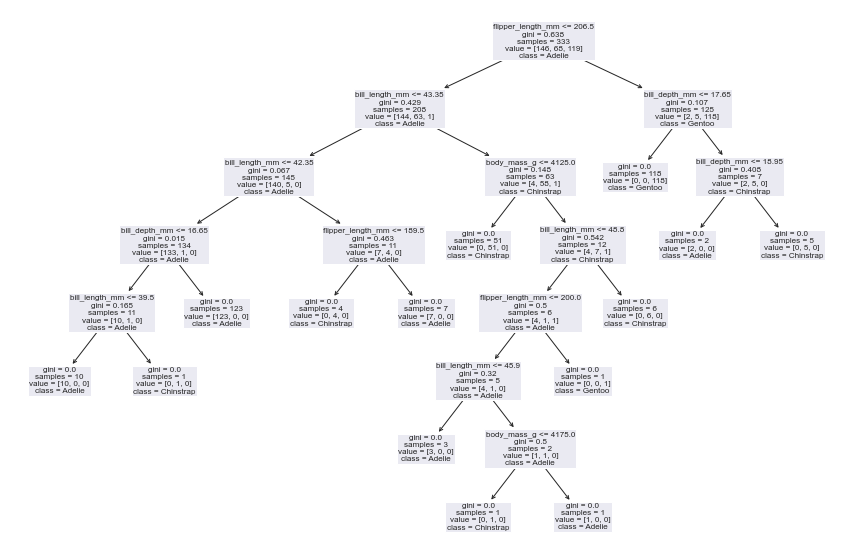

In [7]:
# Part 4

x_feat_list = ['bill_length_mm', 'bill_depth_mm', 
               'flipper_length_mm', 'body_mass_g']

max_depth = None

# extract data from dataframe
x = df_penguin.loc[:, x_feat_list].values
y = df_penguin.loc[:, 'species'].values
    
# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)
    
# initialize empty figure (plot_tree sets text size to fill given figure
# if we resize figure afterwards text size remains too small)
plt.figure()
plt.gcf().set_size_inches(15, 10)
        
# 'plot' decision tree
tree.plot_tree(dec_tree_clf, 
               feature_names=x_feat_list,
               class_names=dec_tree_clf.classes_)

It is not appropriate to use this decision tree on some new unseen sample since it is only relevant to 5 penguins.

## In Class Assignment 2

1. Build a Random Forest Classifier which classifies whether a breast image contains a malignant (growing) or benign (static) tumor.
1. Print a confusion matrix which estimates how well the classifier performs on new breast images.  Qualitatively describe if your classifier is a useful clinical tool to a non-technical expert.
    - If we're estimating performance on new samples we must cross validate (see day 16 part 2)
1. Print a bar plot (`plot_feat_import()`) to describe which features are most useful for classification.  Qualitatively describe if these most important features are clinically meaningful.  In other words:
    - If the classifier performs well, we care about which features helped it work
    - If the classifier doesn't perform well, we don't care which features helped it "work"

In [8]:
from sklearn.datasets import load_breast_cancer

bcancer_dict = load_breast_cancer()

print(bcancer_dict['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
# loading data from sklearn is convenient because its already an array!
x = bcancer_dict['data']
y = bcancer_dict['target']

x_feat_list = bcancer_dict['feature_names']
y_feat_list = bcancer_dict['target_names']
x_feat_list

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
y_feat_list

array(['malignant', 'benign'], dtype='<U9')

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(x, y)

RandomForestClassifier()

In [13]:
from sklearn.model_selection import StratifiedKFold

n_splits = 10
max_depth = 3

# initialize a classifier
rd_fst_clf = RandomForestClassifier(max_depth=max_depth)

skfold = StratifiedKFold(n_splits=n_splits)

y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # index to split training / test data
    x_train = x[train_idx, :]
    x_test = x[test_idx, :]
    y_train = y[train_idx]
    
    # fit happens "inplace", we modify the internal state of classifier to remember all the training samples
    rd_fst_clf = rd_fst_clf.fit(x_train, y_train)

    # estimate
    y_pred[test_idx] = rd_fst_clf.predict(x_test)

Text(0.5, 0.98, 'max_depth=3 Random Forest')

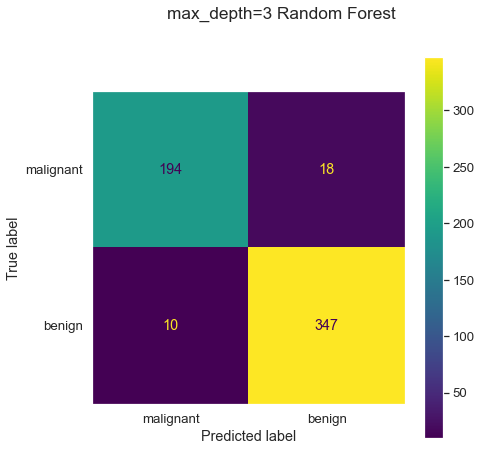

In [14]:
# build and plot confusion matrix
sns.set(font_scale=1.2)
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=y_feat_list)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=3 Random Forest')

Text(0.5, 0, 'Feature importance)')

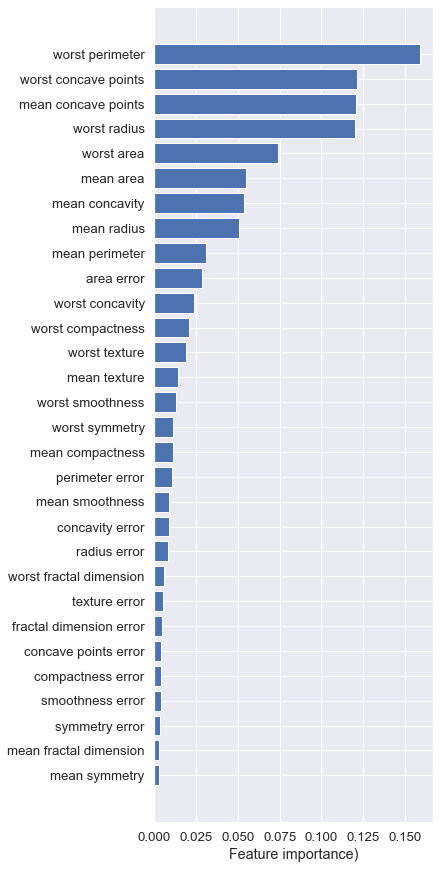

In [13]:
feat_list = x_feat_list
feat_import = rf_clf.feature_importances_
sort = True
limit = None

idx = np.argsort(feat_import).astype(int)
feat_list = [feat_list[_idx] for _idx in idx]
feat_import = feat_import[idx] 

feat_list = feat_list[:limit]
feat_import = feat_import[:limit]
    
# plot and label feature importance
plt.barh(feat_list, feat_import)
plt.gcf().set_size_inches(5, len(feat_list) / 2)
plt.xlabel('Feature importance)')